# Desarrollo de una Red Neuronal Basica paso a paso

In [1]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 

In [2]:
# Importar el data set
os.chdir('D:\DMC VIDEOS\DEEP LEARNING INMERSION\MOD1\MATERIALES')

In [6]:
miArchivo='Churn_Modelling.csv'
df=pd.read_csv(miArchivo)

### ------------------------------------------------------------------------------------------------------------
## **PARTE I - ENTENDIMIENTO Y TRATAMIENTO DE DATOS**
### ------------------------------------------------------------------------------------------------------------

In [5]:
# Revisamos la dimension del dataset!
df.shape

(10000, 14)

In [7]:
# Revisamos los primeros registros del set de datos
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [24]:
#Funcion desarrollada para visualizar la data en base a nuestra target
def printBalanceo(data, field_grouping, data_name):
    print("\nCantidad de elementos por Clase en ", data_name, ":")
    target_count = data[field_grouping].value_counts()
    target_count.plot(kind='bar', title='Count (' + field_grouping + ')');

    print('Clase 0:', target_count[0], "({:.2%})".format(round(target_count[0] / (target_count[0]+target_count[1]), 2)))
    print('Clase 1:', target_count[1], "({:.2%})".format(round(target_count[1] / (target_count[0]+target_count[1]), 2)))
    print('Total  :', data.shape[0])


Cantidad de elementos por Clase en  Dataset :
Clase 0: 7963 (80.00%)
Clase 1: 2037 (20.00%)
Total  : 10000


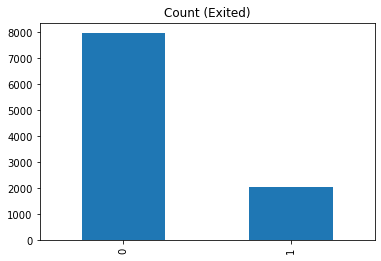

In [25]:
# Revisamos el target del set de datos!
printBalanceo(df,'Exited','Dataset')

In [27]:
#Separamos las columnas numericas y las categoricas (Es recomendable hacer esta separación por buenas prácticas)
ColumnsCategóricas = ['Geography','Gender','HasCrCard','IsActiveMember','Exited']
ColumnsNumericas = ['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']

In [28]:
#Antes de hacer cualquier trabajo con los datos, vemos los valores nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
#Creamos 2 dataset de variables categoricas!
df_categoricas_01=df[ColumnsCategóricas]

In [36]:
df_categoricas_01.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


In [37]:
#Tratamiento de Variables Categoricas
# LabelEncoder
from sklearn.preprocessing import LabelEncoder

for c in df_categoricas_01:
    print(str(c))
    le=LabelEncoder()
    df_categoricas_01[str(c)]=le.fit_transform(df_categoricas_01[str(c)])

Geography
Gender
HasCrCard
IsActiveMember
Exited


<ipython-input-37-1d44c07cf1d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categoricas_01[str(c)]=le.fit_transform(df_categoricas_01[str(c)])


In [38]:
df_categoricas_01.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,0,0,1,1,1
1,2,0,0,1,0
2,0,0,1,0,1
3,0,0,0,0,0
4,2,0,1,1,0


In [39]:
#Concatenamos las información!
df2 = pd.concat([df[ColumnsNumericas],df_categoricas_01],axis=1)

In [40]:
#Ya tenemos nuestra data de manera numerica
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,619,42,2,0.00,1,101348.88,0,0,1,1,1
1,608,41,1,83807.86,1,112542.58,2,0,0,1,0
2,502,42,8,159660.80,3,113931.57,0,0,1,0,1
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,2,0,1,1,0


In [41]:
#Separamos las covariables y la target !
X=df2.iloc[:,:10]
y=df2.iloc[:,10]

### ------------------------------------------------------------------------------------------------------------------------
## **PARTE II - PARTICION MUESTRAL  Y ESCALAMIENTO DE DATOS**
### ------------------------------------------------------------------------------------------------------------------------

In [44]:
#Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, #covariables
                                                 y, #target
                                                 test_size=0.33, #33% de la data total para data de testing
                                                 random_state=111,
                                                 stratify=y)

In [45]:
#Importante !!!
#Escalado de variables
from sklearn.preprocessing import StandardScaler #Importamos el modulo
sc_X=StandardScaler()                            #Definimos la funcion
X_train = sc_X.fit_transform(X_train)            # entrenamos y aplicamos
X_test = sc_X.fit_transform(X_test)              # entrenamos y aplicamos

### ------------------------------------------------------------------------------------------------------------------------
## **PARTE III - CONSTRUCCION DE LA RED NEURONAL ARTIFICIAL**
### ------------------------------------------------------------------------------------------------------------------------

In [49]:
#pip install keras

In [55]:
# Importar Keras y librerías adicionales
import keras
from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

In [50]:
# Inicializar la RNA.
# Si la definimos como secuencia de capas es mucho mas facil despues trabajar con ellas.
classifier = Sequential() # Podria codificar aca las capas y demas pero lo hacemos una a una.

In [51]:
# Añadir las capas de entrada y primera capa oculta
# Dense es un tipo de capa, la necesitamos codificar. 
# units : Numero de neuronas
# kernel_initializer : Inicializacion de pesos.
# activation : Funcion de activacion que te ayuda a la ingenieria de variables!(evita la linealidad)
# input_dim : Es el numero de variables o X o features.
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu", input_dim = 10)) # Primera capa oculta
#classifier.add(Dropout(p = 0.05))

In [52]:
# Añadir la segunda capa oculta
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))
#classifier.add(Dropout(p = 0.01)) # Regularización

In [53]:
# Añadir la capa de salida
# Solo necesitamos una unidad pues tenemos un resultado binario.
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
# Si tengo mas de 2 categorias , puedo mantener la funcion de activacion sigmoide? +1
#Si es multinomial, la que me convendria sería softmax

In [61]:
# Compilar la RNA
# Podemos probar con distintos optimizadores
#loss=funcion de costo 
    #-----------binary_crossentropy(entropia cruzada)-para clasificacion
    #-----------Error cuadratico medio(MSE) -para regresion(se cambiara la funcion de activation de la capa salida )
#optimizer
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [62]:
classifier.summary() #Visualizamos nuestra arquitectura de red

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


### ------------------------------------------------------------------------------------------------------------------------
## **PARTE IV - ENTRENAMIENTO DE LA RED NEURONAL ARTIFICIAL**
### -------------------------------------------------------------------------------------------------------------------------

In [63]:
# Ajustamos la RNA al Conjunto de Entrenamiento
# batch_size : Numero de observaciones antes de actualizar los pesos/ tamaño del bloque a procesar.
# epochs     : Numero de iteracciones globales / Mas veces mas aprendizaje u overfitting.
history = classifier.fit(X_train, 
                         y_train, 
                         validation_split=0.33, 
                         batch_size = 32, 
                         epochs = 100)
# abusar de las epochs podria significar caer en un sobreajuste(overfitting)

Epoch 1/100
141/141 [==============================] - 3s 6ms/step - loss: 0.6727 - accuracy: 0.8076 - val_loss: 0.5439 - val_accuracy: 0.7839
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.8019 - val_loss: 0.4606 - val_accuracy: 0.7839
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8089 - val_loss: 0.4577 - val_accuracy: 0.7839
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7979 - val_loss: 0.4550 - val_accuracy: 0.7839
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.7977 - val_loss: 0.4540 - val_accuracy: 0.7839
Epoch 6/100
141/141 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8002 - val_loss: 0.4528 - val_accuracy: 0.7839
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8063 - val_loss: 0.4521 - val_accuracy: 0.7839

In [64]:
# Evaluar el modelo y calcular predicciones finales
y_pred_train  = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

### -----------------------------------------------------------------------------------------------------------------
## **PARTE V - VALIDACION DE LA RED NEURONAL ARTIFICIAL**
### -----------------------------------------------------------------------------------------------------------------

In [65]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix,recall_score,f1_score,accuracy_score,classification_report

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

recall_train = accuracy_score(y_train, y_pred_train)
recall_test = accuracy_score(y_test, y_pred_test)


print(cm_train)
print('------------------------')
print(cm_test)
print('------------------------')
print(recall_train)
print(recall_test)

[[5181  154]
 [ 937  428]]
------------------------
[[2548   80]
 [ 484  188]]
------------------------
0.8371641791044776
0.8290909090909091


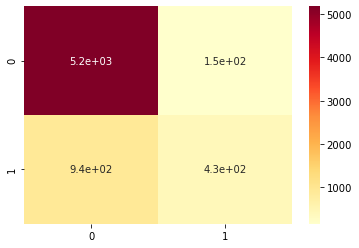

In [92]:
sns.heatmap(cm_train,cmap='YlOrRd',annot=True)

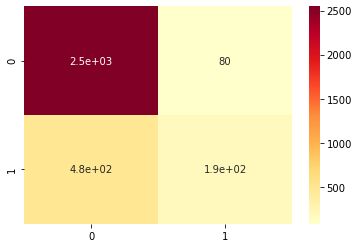

In [85]:
sns.heatmap(cm_test,cmap='YlOrRd',annot=True)

In [68]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_test).ravel()
(tn,fp,fn,tp)

(2548, 80, 484, 188)

In [93]:
#Generamos la matriz de reporte

In [71]:
matrix_train = classification_report(y_train,y_pred_train)
print('Classification Report-Train: \n', matrix_train)

Classification Report-Train: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      5335
           1       0.74      0.31      0.44      1365

    accuracy                           0.84      6700
   macro avg       0.79      0.64      0.67      6700
weighted avg       0.82      0.84      0.81      6700



In [70]:
matrix_test = classification_report(y_test,y_pred_test)
print('Classification Report-Test: \n', matrix_test)

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      2628
           1       0.70      0.28      0.40       672

    accuracy                           0.83      3300
   macro avg       0.77      0.62      0.65      3300
weighted avg       0.81      0.83      0.80      3300



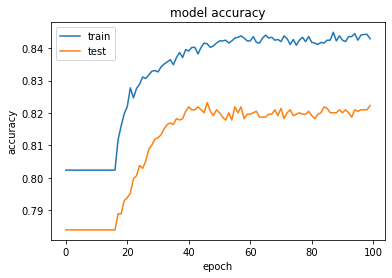

In [73]:
# Resumen del historial del accuracy!
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

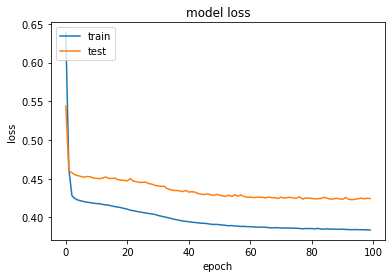

In [74]:
# Resumen del historial del error!
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()